<a href="https://colab.research.google.com/github/Cinnameldehyde/Major-work/blob/main/GlassesGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[hf-datasets]
import kagglehub
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[hf-datasets]
import kagglehub

# Download the entire dataset
dataset_path = kagglehub.dataset_download(
  "jeffheaton/glasses-or-no-glasses"
)

print("Dataset downloaded to:", dataset_path)

Using Colab cache for faster access to the 'glasses-or-no-glasses' dataset.
Dataset downloaded to: /kaggle/input/glasses-or-no-glasses


In [ ]:
# running twice to ensure corrcect path
# Install dependencies as needed:
# pip install kagglehub[hf-datasets]
import kagglehub

# Download the entire dataset
dataset_path = kagglehub.dataset_download(
  "jeffheaton/glasses-or-no-glasses"
)

print("Dataset downloaded to:", dataset_path)

shifting data from cache to drive

In [ ]:
# import os

# # Set the source and destination paths
# source_path = "/kaggle/input/glasses-or-no-glasses"
# destination_path = "/content/drive/MyDrive/Datasets/glasses-or-no-glasses"

# # Ensure the destination directory exists
# os.makedirs(destination_path, exist_ok=True)

# # Use shell command to copy all contents from source to destination
# !cp -r "{source_path}/." "{destination_path}"

# print("Dataset copied to:", destination_path)

Cleaning up the train and test csv files


In [ ]:
import pandas as pd
import os

# Base dataset path
base_path = "/kaggle/input/glasses-or-no-glasses"

train_csv = os.path.join(base_path, "train.csv")
test_csv = os.path.join(base_path, "test.csv")

# Load CSVs
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# --- Clean train.csv (keep id + glasses only) ---
if "glasses" in train_df.columns:
    train_df = train_df[['id', 'glasses']]

# --- Clean test.csv (keep only id) ---
test_df = test_df[['id']]

# Save cleaned versions back to cache folder
train_clean_path = "/root/.cache/glasses/train_clean.csv"
test_clean_path =  "/root/.cache/glasses/test_clean.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(train_clean_path), exist_ok=True)

train_df.to_csv(train_clean_path, index=False)
test_df.to_csv(test_clean_path, index=False)

print("✅ Cleaned train.csv saved as train_clean.csv")
print("✅ Cleaned test.csv saved as test_clean.csv")

# Quick peek
print("\nTrain CSV sample:\n", train_df.head())
print("\nTest CSV sample:\n", test_df.head())

✅ Cleaned train.csv saved as train_clean.csv
✅ Cleaned test.csv saved as test_clean.csv

Train CSV sample:
    id  glasses
0   1        0
1   2        1
2   3        1
3   4        0
4   5        0

Test CSV sample:
      id
0  4501
1  4502
2  4503
3  4504
4  4505


organise train and test dataset

In [ ]:
import os
import shutil

# Source (read-only) folder
src_img_path = os.path.join(base_path, "faces-spring-2020/faces-spring-2020")

# Destination (writable) base folder
dst_base = "/root/.cache/glasses"
img_path = os.path.join(dst_base, "images")
train_folder = os.path.join(dst_base, "train")
test_folder = os.path.join(dst_base, "test")

# Make sure folders exist
os.makedirs(img_path, exist_ok=True)
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Step 1: Copy and rename images (remove "face-" prefix)
for img_name in os.listdir(src_img_path):
    if img_name.startswith("face-") and img_name.endswith(".png"):
        new_name = img_name.replace("face-", "")
        src = os.path.join(src_img_path, img_name)
        dst = os.path.join(img_path, new_name)
        if not os.path.exists(dst):  # avoid re-copying if already done
            shutil.copy(src, dst)

# Step 2: List all copied images sorted numerically
images = sorted(
    [f for f in os.listdir(img_path) if f.endswith(".png")],
    key=lambda x: int(os.path.splitext(x)[0])
)

# Step 3: Move first 4500 images to train
for img_name in images[:4500]:
    src = os.path.join(img_path, img_name)
    dst = os.path.join(train_folder, img_name)
    if not os.path.exists(dst):
        shutil.copy(src, dst)

# Step 4: Move remaining images (4501–5000) to test
for img_name in images[4500:5000]:
    src = os.path.join(img_path, img_name)
    dst = os.path.join(test_folder, img_name)
    if not os.path.exists(dst):
        shutil.copy(src, dst)

print("✅ Dataset copied and split into /root/.cache/glasses/train and /root/.cache/glasses/test")


✅ Dataset copied and split into /root/.cache/glasses/train and /root/.cache/glasses/test


In [ ]:
import pandas as pd
import shutil
import os

base_path = "/root/.cache/glasses"
# Load the CSV
csv_path = "/root/.cache/glasses/train_clean.csv"
df = pd.read_csv(csv_path)

# Create subfolders if they don't exist
glasses_folder = os.path.join(train_folder, "glasses")
no_glasses_folder = os.path.join(train_folder, "no_glasses")
os.makedirs(glasses_folder, exist_ok=True)
os.makedirs(no_glasses_folder, exist_ok=True)

# Move images based on CSV
for idx, row in df.iterrows():
    img_name = f"{int(row['id'])}.png"  # Convert id to int to avoid .0
    src = os.path.join(train_folder, img_name)

    if not os.path.exists(src):
        print(f"Image {img_name} not found, skipping...")
        continue

    dst = glasses_folder if row['glasses'] == 1 else no_glasses_folder
    shutil.move(src, os.path.join(dst, img_name))

print("Train folder segregated into glasses and no_glasses based on train.csv!")


Train folder segregated into glasses and no_glasses based on train.csv!


In [ ]:

base_path = "/root/.cache/glasses"
for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:3]:  # show only 3 files for preview
        print(f"{subindent}{f}")


glasses/
  train_clean.csv
  test_clean.csv
  test/
    4930.png
    4763.png
    4628.png
  images/
    2216.png
    243.png
    2807.png
  train/
    no_glasses/
      2216.png
      243.png
      4176.png
    glasses/
      2807.png
      1658.png
      330.png


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

train_data = datasets.ImageFolder(train_folder, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

print("Classes:", train_data.classes)  # ['glasses', 'no_glasses']


Classes: ['glasses', 'no_glasses']


setup GAN

In [ ]:
import torch.nn as nn

z_dim = 128  # latent vector size
class Generator(nn.Module):
    def __init__(self, z_dim=128, img_channels=3, feature_g=32):  # was 64
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, feature_g*8, 4, 1, 0, bias=False), # 1→4
            nn.BatchNorm2d(feature_g*8),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g*8, feature_g*4, 4, 2, 1, bias=False), # 4→8
            nn.BatchNorm2d(feature_g*4),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g*4, feature_g*2, 4, 2, 1, bias=False), # 8→16
            nn.BatchNorm2d(feature_g*2),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g*2, feature_g, 4, 2, 1, bias=False),   # 16→32
            nn.BatchNorm2d(feature_g),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False),  # 32→64
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=32):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(img_channels, feature_d, 4, 2, 1, bias=False),   # 64→32
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d, feature_d*2, 4, 2, 1, bias=False),    # 32→16
            nn.BatchNorm2d(feature_d*2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d*2, feature_d*4, 4, 2, 1, bias=False),  # 16→8
            nn.BatchNorm2d(feature_d*4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d*4, feature_d*8, 4, 2, 1, bias=False),  # 8→4
            nn.BatchNorm2d(feature_d*8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d*8, 1, 4, 1, 0, bias=False)             # 4→1
            # 🚫 no sigmoid here
        )

    def forward(self, img):
        return self.net(img).view(-1, 1)   # [batch_size, 1]




model training

In [ ]:
import random
import torchvision.transforms.functional as TF

def adaptive_augment(image, p=0.2):
    """Apply augmentations with probability p"""
    if random.random() < p: image = TF.hflip(image)
    if random.random() < p: image = TF.adjust_brightness(image, 0.8 + 0.4*random.random())
    if random.random() < p: image = TF.adjust_contrast(image, 0.8 + 0.4*random.random())
    return image


/tmp/ipython-input-899084550.py:5: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()   # for mixed precision


Epoch 1/20:   0%|          | 0/71 [00:00<?, ?it/s]

/tmp/ipython-input-899084550.py:29: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-899084550.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 2/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 3/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 4/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 5/20:   0%|          | 0/71 [00:00<?, ?it/s]

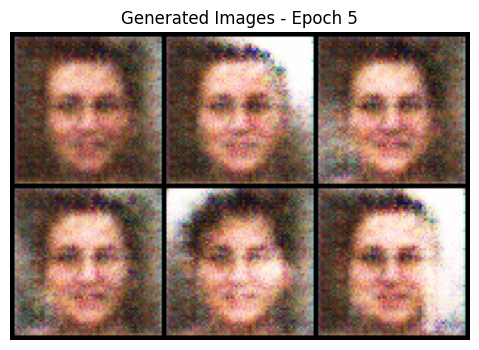

Epoch 6/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 7/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 8/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 9/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 10/20:   0%|          | 0/71 [00:00<?, ?it/s]

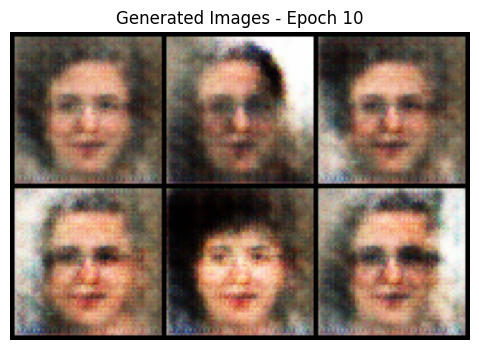

Epoch 11/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 12/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 13/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 14/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 15/20:   0%|          | 0/71 [00:00<?, ?it/s]

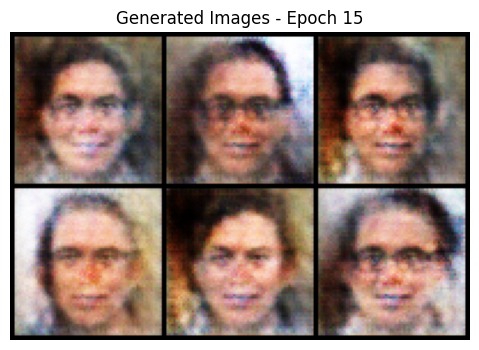

Epoch 16/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 17/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 18/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 19/20:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 20/20:   0%|          | 0/71 [00:00<?, ?it/s]

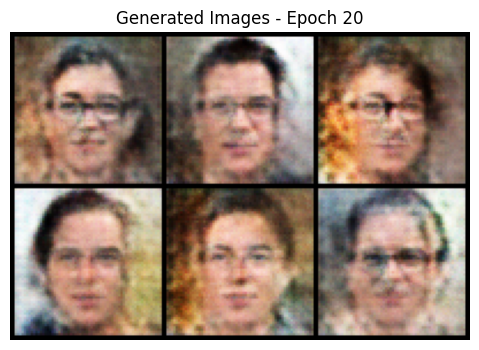

In [26]:
import torch.optim as optim
import torchvision.utils as vutils
from tqdm.notebook import tqdm

scaler = torch.cuda.amp.GradScaler()   # for mixed precision
device = "cuda" if torch.cuda.is_available() else "cpu"

G = Generator(z_dim=z_dim).to(device)
D = Discriminator().to(device)

criterion = nn.BCEWithLogitsLoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
opt_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

epochs = 20
fixed_noise = torch.randn(6, z_dim, 1, 1, device=device)

for epoch in range(epochs):
    loop = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{epochs}")

    for i, (imgs, _) in loop:
        imgs = imgs.to(device)
        bs = imgs.size(0)

        real_labels = torch.ones(bs, 1, device=device)
        fake_labels = torch.zeros(bs, 1, device=device)

        # === Train Discriminator ===
        with torch.cuda.amp.autocast():
            real_out = D(adaptive_augment(imgs))
            d_loss_real = criterion(real_out, real_labels)

            z = torch.randn(bs, z_dim, 1, 1, device=device)
            fake_imgs = G(z)
            fake_out = D(adaptive_augment(fake_imgs.detach()))
            d_loss_fake = criterion(fake_out, fake_labels)

            d_loss = d_loss_real + d_loss_fake

        opt_D.zero_grad()
        scaler.scale(d_loss).backward()
        scaler.step(opt_D)
        scaler.update()

        # === Train Generator ===
        with torch.cuda.amp.autocast():
            fake_out = D(adaptive_augment(fake_imgs))
            g_loss = criterion(fake_out, real_labels)

        opt_G.zero_grad()
        scaler.scale(g_loss).backward()
        scaler.step(opt_G)
        scaler.update()

        loop.set_postfix({"D_loss": d_loss.item(), "G_loss": g_loss.item()})

    # === Visualise every 5 epochs ===
    if (epoch+1) % 5 == 0:
        G.eval()
        with torch.no_grad():
            fake_samples = G(fixed_noise).detach().cpu()
        G.train()

        grid = vutils.make_grid(fake_samples, nrow=3, padding=2, normalize=True)
        plt.figure(figsize=(6,4))
        plt.axis("off")
        plt.title(f"Generated Images - Epoch {epoch+1}")
        plt.imshow(np.transpose(grid, (1,2,0)))
        plt.show()


Epoch 21/50:   0%|          | 0/71 [00:00<?, ?it/s]

/tmp/ipython-input-17058619.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-17058619.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 22/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 23/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 24/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 25/50:   0%|          | 0/71 [00:00<?, ?it/s]

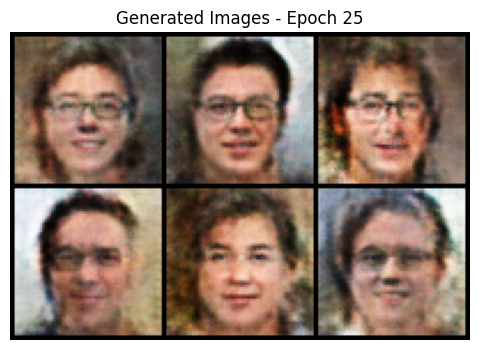

Epoch 26/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 27/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 28/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 29/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 30/50:   0%|          | 0/71 [00:00<?, ?it/s]

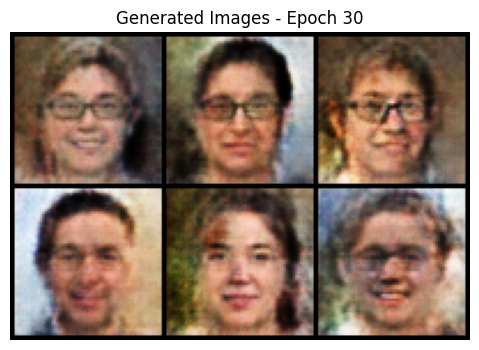

Epoch 31/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 32/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 33/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 34/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 35/50:   0%|          | 0/71 [00:00<?, ?it/s]

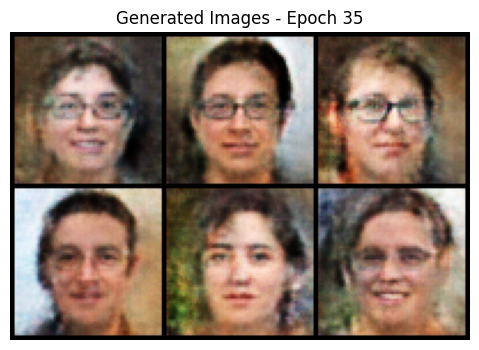

Epoch 36/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 37/50:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 38/50:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
# Continue training from epoch 21 to 50
start_epoch = 20  # because you already ran 20 epochs
total_epochs = 50

for epoch in range(start_epoch, total_epochs):
    loop = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{total_epochs}")

    for i, (imgs, _) in loop:
        imgs = imgs.to(device)
        bs = imgs.size(0)

        real_labels = torch.ones(bs, 1, device=device)
        fake_labels = torch.zeros(bs, 1, device=device)

        # === Train Discriminator ===
        with torch.cuda.amp.autocast():
            real_out = D(adaptive_augment(imgs))
            d_loss_real = criterion(real_out, real_labels)

            z = torch.randn(bs, z_dim, 1, 1, device=device)
            fake_imgs = G(z)
            fake_out = D(adaptive_augment(fake_imgs.detach()))
            d_loss_fake = criterion(fake_out, fake_labels)

            d_loss = d_loss_real + d_loss_fake

        opt_D.zero_grad()
        scaler.scale(d_loss).backward()
        scaler.step(opt_D)
        scaler.update()

        # === Train Generator ===
        with torch.cuda.amp.autocast():
            fake_out = D(adaptive_augment(fake_imgs))
            g_loss = criterion(fake_out, real_labels)

        opt_G.zero_grad()
        scaler.scale(g_loss).backward()
        scaler.step(opt_G)
        scaler.update()

        loop.set_postfix({"D_loss": d_loss.item(), "G_loss": g_loss.item()})

    # === Visualise every 5 epochs ===
    if (epoch+1) % 5 == 0:
        G.eval()
        with torch.no_grad():
            fake_samples = G(fixed_noise).detach().cpu()
        G.train()

        grid = vutils.make_grid(fake_samples, nrow=3, padding=2, normalize=True)
        plt.figure(figsize=(6,4))
        plt.axis("off")
        plt.title(f"Generated Images - Epoch {epoch+1}")
        plt.imshow(np.transpose(grid, (1,2,0)))
        plt.show()
